In [1]:
import sys, os, pygmt, importlib
mod_path = '/home/581/da1339/AFIM/src/AFIM/src'
sys.path.insert(0, mod_path)
from sea_ice_toolbox         import SeaIceToolbox, SeaIceToolboxManager
import numpy                 as np
import pandas                as pd
import xarray                as xr
import xesmf                 as xe
import matplotlib.pyplot     as plt
from matplotlib.colors       import LogNorm
from pathlib                 import Path

In [15]:
# ---- Nominal ice properties ----
rho_i = 900.0      # kg/m^3
h_i   = 1.0        # m
i_mass = rho_i * h_i  # kg/m^2

print(f"i_mass = rho_i * h_i = {i_mass:g} kg m^-2")


i_mass = rho_i * h_i = 900 kg m^-2


In [16]:


# ---- Parameter ranges (log-spaced) ----
tau_star = np.logspace(np.log10(0.1), np.log10(100.0), 300)  # interpret as Ku in Pa
F2       = np.logspace(np.log10(0.1), np.log10(100.0), 300)

TAU, F2G = np.meshgrid(tau_star, F2)

# Cs(Ku, F2) = Ku / (i_mass * F2)
Cs = TAU / (i_mass * F2G)


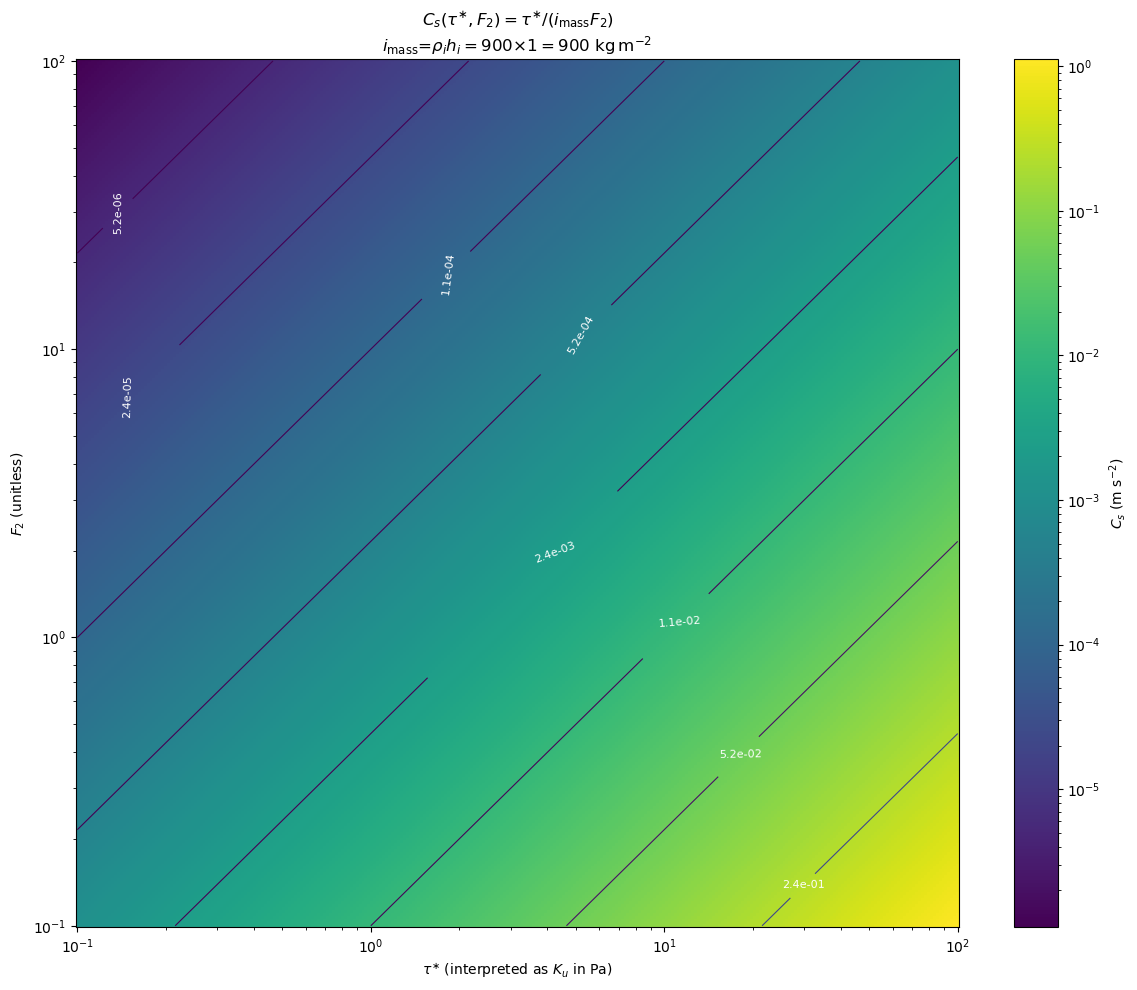

In [17]:

fig, ax = plt.subplots(figsize=(12,10))

pcm = ax.pcolormesh(
    TAU, F2G, Cs,
    shading="auto",
    norm=LogNorm(vmin=Cs.min(), vmax=Cs.max())
)
# Log-spaced contour levels for Cs
levels = np.logspace(np.log10(Cs.min()), np.log10(Cs.max()), 10)
cs_cont = ax.contour(TAU, F2G, Cs, levels=levels, linewidths=0.8)
ax.clabel(cs_cont, inline=True, fontsize=8, fmt="%.1e", colors='white')

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$\tau^{\ast}$ (interpreted as $K_u$ in Pa)")
ax.set_ylabel(r"$F_2$ (unitless)")
ax.set_title(r"$C_s(\tau^{\ast},F_2)=\tau^{\ast}/(i_{\mathrm{mass}}F_2)$"
             + "\n" + r"$i_{{\mathrm{{mass}}}}$=$\rho_i h_i=$" + f"{rho_i:g}" + r"$\times$" + f"{h_i:g}" + r"$=$" + f"{i_mass:g}" + r"$\ \mathrm{{kg\,m^{{-2}}}}$")

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r"$C_s$ (m s$^{-2}$)")

plt.tight_layout()
plt.show()


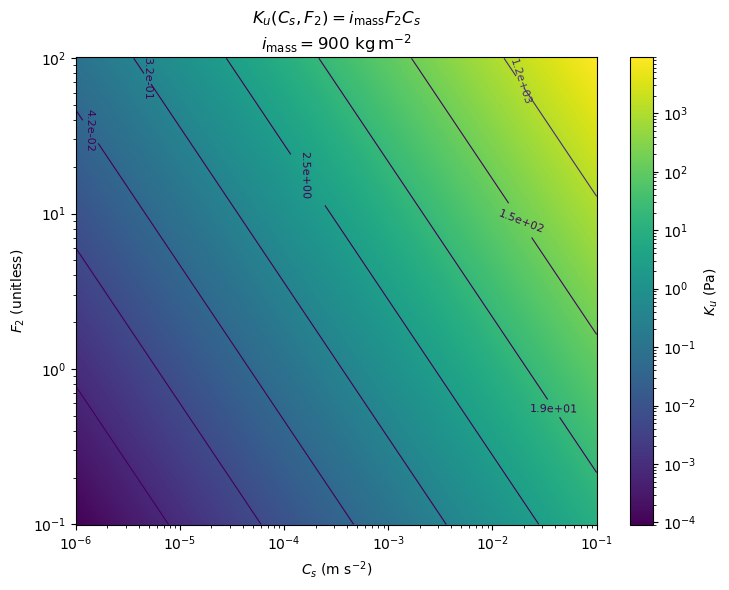

In [18]:
# companion Ku(Cs, F2) map
#
# This is often the more "actionable" tuning view:
# "If I pick Cs and my computed F2 field looks like X, what Ku (Pa) am I applying?"

Cs_grid = np.logspace(-6, -1, 300)     # m s^-2  (adjust range if you like)
F2_grid = np.logspace(-1,  2, 300)     # unitless

CSG, F2G2 = np.meshgrid(Cs_grid, F2_grid)

# Ku = i_mass * F2 * Cs   [Pa]
Ku = i_mass * F2G2 * CSG

fig, ax = plt.subplots(figsize=(7.5, 6))

pcm = ax.pcolormesh(
    CSG, F2G2, Ku,
    shading="auto",
    norm=LogNorm(vmin=Ku.min(), vmax=Ku.max())
)

levels = np.logspace(np.log10(Ku.min()), np.log10(Ku.max()), 10)
ku_cont = ax.contour(CSG, F2G2, Ku, levels=levels, linewidths=0.8)
ax.clabel(ku_cont, inline=True, fontsize=8, fmt="%.1e")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$C_s$ (m s$^{-2}$)")
ax.set_ylabel(r"$F_2$ (unitless)")
ax.set_title(
    r"$K_u(C_s,F_2)=i_{\mathrm{mass}}F_2C_s$"
    + "\n"
    + r"$i_{{\mathrm{{mass}}}}=$" + f"{i_mass:g}" + r"$\ \mathrm{{kg\,m^{{-2}}}}$"
)

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r"$K_u$ (Pa)")

plt.tight_layout()
plt.show()
